In [1007]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1008]:
events_data = pd.read_csv('../data/stepik ML contest/event_data_train.csv')
submissions_data = pd.read_csv('../data/stepik ML contest/submissions_data_train.csv')

In [1009]:
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [1010]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [1011]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [1012]:
events_data['day'] = events_data.date.dt.date

In [1013]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [1014]:
events_data.groupby('day').user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

<AxesSubplot:xlabel='day'>

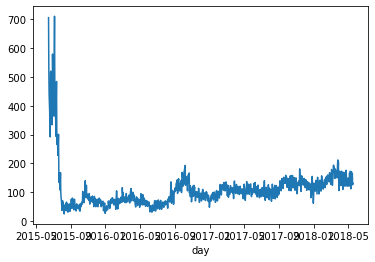

In [1015]:
events_data.groupby('day').user_id.nunique().plot()

<AxesSubplot:>

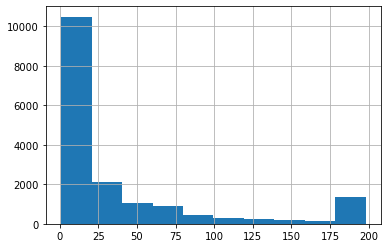

In [1016]:
events_data[events_data.action == 'passed']\
    .groupby('user_id', as_index=False)\
    .agg({'step_id': 'count'})\
    .rename(columns={'step_id': 'passed_steps'}).passed_steps.hist()

In [1017]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count',
                        fill_value=0).reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [1018]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [1019]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date

In [1020]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [1021]:
users_scores = submissions_data.pivot_table(index='user_id',
                            columns='submission_status',
                                            values='step_id',
                                           aggfunc='count',
                                           fill_value=0).reset_index()

In [1022]:
users_events_data = events_data.pivot_table(index='user_id',
                            columns='action',
                                            values='step_id',
                                           aggfunc='count',
                                           fill_value=0).reset_index()

In [1023]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [1024]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day'])\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).values

In [1025]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [1026]:
gap_data = gap_data / (24 * 60 * 60)

<AxesSubplot:>

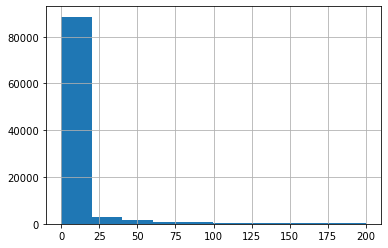

In [1027]:
gap_data[gap_data < 200].hist()

In [1028]:
gap_data.quantile(0.90)

18.325995370370403

In [1029]:
events_data.groupby('user_id', as_index=False).agg({'action': 'count'}).sort_values('action', ascending=False)

,user_id,action
15007,20907,33043
7780,10794,16436
18150,25279,10179
781,1046,9095
2611,3572,7905
...,...,...
14064,19546,2
0,1,2
8225,11437,1
6334,8773,1


In [1030]:
user_data = events_data.groupby('user_id', as_index=False)\
    .agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_timestamp'})

In [1031]:
now = 1526772811
drop_out_threshold = 259200

In [1032]:
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [1033]:
user_data['is_gone_user'] = (now - user_data.last_timestamp) > drop_out_threshold

In [1034]:
user_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [1035]:
user_data = user_data.merge(users_scores, how='outer').head()

In [1036]:
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN


In [1037]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [1038]:
user_data = user_data.fillna(0)

In [1039]:
user_data = user_data.merge(users_events_data, how='outer')

In [1040]:
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1


In [1041]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()


In [1042]:
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [1043]:
user_data = user_data.merge(users_days, how='outer')

In [1044]:
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1,1
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10,2
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192,7
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12,2
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1,1


In [1045]:
user_data['passed_course'] = user_data.passed > 170

In [1046]:
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1,1,False
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10,2,False
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192,7,False
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12,2,False
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1,1,False


In [1047]:
events_data = pd.read_csv('../data/stepik ML contest/event_data_train.csv')
submission_data = pd.read_csv('../data/stepik ML contest/submissions_data_train.csv')
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')
events_data['day'] = events_data.date.dt.date

submission_data['date'] = pd.to_datetime(submission_data.timestamp, unit = 's')
submission_data['day'] = submission_data.date.dt.date

users_data = events_data.groupby('user_id', as_index= False)\
        .agg({'timestamp': 'max'})\
        .rename({'timestamp':'last_timestamp'}, axis = 'columns')
now = 1526772811
drop_out_threasold = 2592000

users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threasold
users_scores = submission_data.pivot_table(index='user_id',\
                        columns = 'submission_status',\
                        values = 'step_id',\
                        aggfunc = 'count',\
                        fill_value = 0)\
                        .reset_index()
users_data = users_data.merge(users_scores, on = 'user_id', how = 'outer')
users_data = users_data.fillna(0)
users_invent_data = events_data.pivot_table(index = 'user_id',
                        columns = 'action',
                        values  = 'step_id',
                        aggfunc = 'count',
                        fill_value = 0).reset_index()
users_data = users_data.merge(users_invent_data, how = 'outer')
users_days = events_data.groupby('user_id').day.nunique()
users_days.to_frame().reset_index()
users_data = users_data.merge(users_days, on = 'user_id', how = 'outer')
users_data['passed_course'] = users_data.passed > 170


In [1048]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


<AxesSubplot:>

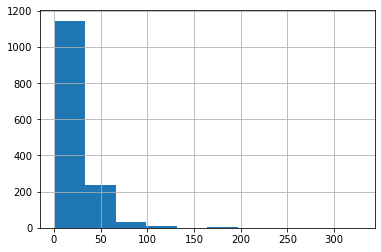

In [1049]:
users_data[users_data.passed_course].day.hist()

In [1050]:
user_min_time = events_data.groupby('user_id', as_index=False)\
    .agg({'timestamp': 'min'})\
    .rename({'timestamp': 'min_timestamp'}, axis=1)


In [1051]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [1052]:
users_data = users_data.merge(user_min_time, how='outer')

In [1053]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [1054]:
event_data_train = pd.DataFrame


In [1055]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [1056]:
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)

In [1057]:
events_data.head()


,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895


In [1058]:
learning_time_threshold = 3 * 24 * 60 * 60

In [1059]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [1060]:
user_learning_time_threshold = user_min_time.user_id.map(str) + '_' + (user_min_time.min_timestamp + learning_time_threshold).map(str)

In [1061]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold

In [1062]:
user_min_time.head()

events_data = events_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')

In [1063]:
events_data = events_data.drop(columns=['user_learning_time_threshold'])

In [1064]:
events_data = events_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')


In [1065]:
events_data

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
...,...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1527021864
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_1527021864
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1527031950
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_1527031950


In [1066]:
events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_threshold]

In [1067]:
events_data_train.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [1068]:
events_data_train.groupby('user_id').day.nunique().max()


4

In [1069]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [1070]:
submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)


In [1071]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day,users_time
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15,15853_1434349275
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15,15853_1434348300
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11,15853_1478852149
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11,15853_1478852164
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15,15853_1434348123


In [1072]:
user_min_time.head()

,user_id,min_timestamp,user_learning_time_threshold
0,1,1472827464,1_1473086664
1,2,1514383364,2_1514642564
2,3,1434358476,3_1434617676
3,5,1466156809,5_1466416009
4,7,1521634660,7_1521893860


In [1073]:
submissions_data.shape

(509104, 7)

In [1074]:
user_min_time.shape

(19234, 3)

In [1075]:
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']])

In [1076]:
submissions_data.shape

(509104, 8)

In [1077]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day,users_time,user_learning_time_threshold
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15,15853_1434349275,15853_1434605177
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15,15853_1434348300,15853_1434605177
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11,15853_1478852149,15853_1434605177
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11,15853_1478852164,15853_1434605177
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15,15853_1434348123,15853_1434605177


In [1078]:
submissions_data_train = submissions_data[submissions_data.users_time <= submissions_data.user_learning_time_threshold]


In [1079]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day,users_time,user_learning_time_threshold
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15,15853_1434349275,15853_1434605177
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15,15853_1434348300,15853_1434605177
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11,15853_1478852149,15853_1434605177
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11,15853_1478852164,15853_1434605177
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15,15853_1434348123,15853_1434605177


In [1080]:
submissions_data.shape

(509104, 8)

In [1081]:
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [1082]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index()

In [1083]:
X.head()

,user_id,day
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3


In [1084]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index()\
    .rename(columns={'step_id': 'steps_tried'})

In [1085]:
steps_tried.head()

,user_id,steps_tried
0,2,2
1,3,4
2,8,11
3,14,1
4,16,23


In [1086]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [1087]:
X.shape

(8913, 3)

In [1088]:
X = X.rename(columns={'day': 'days'})

In [1089]:
X.head()

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23


In [1090]:
X = X.merge(submissions_data_train.pivot_table(index='user_id',
                                   columns='submission_status',
                                   values='step_id',
                                   aggfunc='count',
                                   fill_value=0).reset_index())

In [1091]:
X.shape

(8913, 5)

In [1092]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)

In [1093]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.00
1,3,1,4,4,4,0.50
2,8,1,11,9,21,0.30
3,14,1,1,0,1,0.00
4,16,3,23,23,27,0.46


In [1094]:
events_data_train.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [1095]:
X = X.merge(events_data_train.pivot_table(index='user_id',
            columns='action',
            values='step_id',
            aggfunc='count',
            fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')

In [1096]:
X = X.fillna(0)

In [1097]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.00,9
1,3,1.0,4.0,4.0,4.0,0.50,20
2,8,1.0,11.0,9.0,21.0,0.30,154
3,14,1.0,1.0,0.0,1.0,0.00,9
4,16,3.0,23.0,23.0,27.0,0.46,132


In [1098]:
X = X.merge(users_data[['user_id', 'passed_course', 'is_gone_user']], how='outer')

In [1099]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True


In [1100]:
X = X[-((X.is_gone_user == False) & (X.passed_course == False))]

In [1101]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True


In [1102]:
X.groupby(['passed_course', 'is_gone_user']).user_id.count()

passed_course  is_gone_user
False          True            16560
True           False             141
               True             1284
Name: user_id, dtype: int64

In [1103]:
y = X.passed_course.map(int)

In [1104]:
X = X.drop(columns=['passed_course', 'is_gone_user'])

In [1105]:
X = X.set_index(X.user_id)

In [1106]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,,
2,2,1.0,2.0,2.0,0.0,1.00,9
3,3,1.0,4.0,4.0,4.0,0.50,20
8,8,1.0,11.0,9.0,21.0,0.30,154
14,14,1.0,1.0,0.0,1.0,0.00,9
16,16,3.0,23.0,23.0,27.0,0.46,132


In [1107]:
X = X.drop(columns='user_id')

In [1108]:
X.head()

,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
2,1.0,2.0,2.0,0.0,1.00,9
3,1.0,4.0,4.0,4.0,0.50,20
8,1.0,11.0,9.0,21.0,0.30,154
14,1.0,1.0,0.0,1.0,0.00,9
16,3.0,23.0,23.0,27.0,0.46,132


In [1109]:
from sklearn.model_selection import train_test_split

In [1110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [1111]:
from sklearn import tree

In [1112]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100)

In [1113]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100)

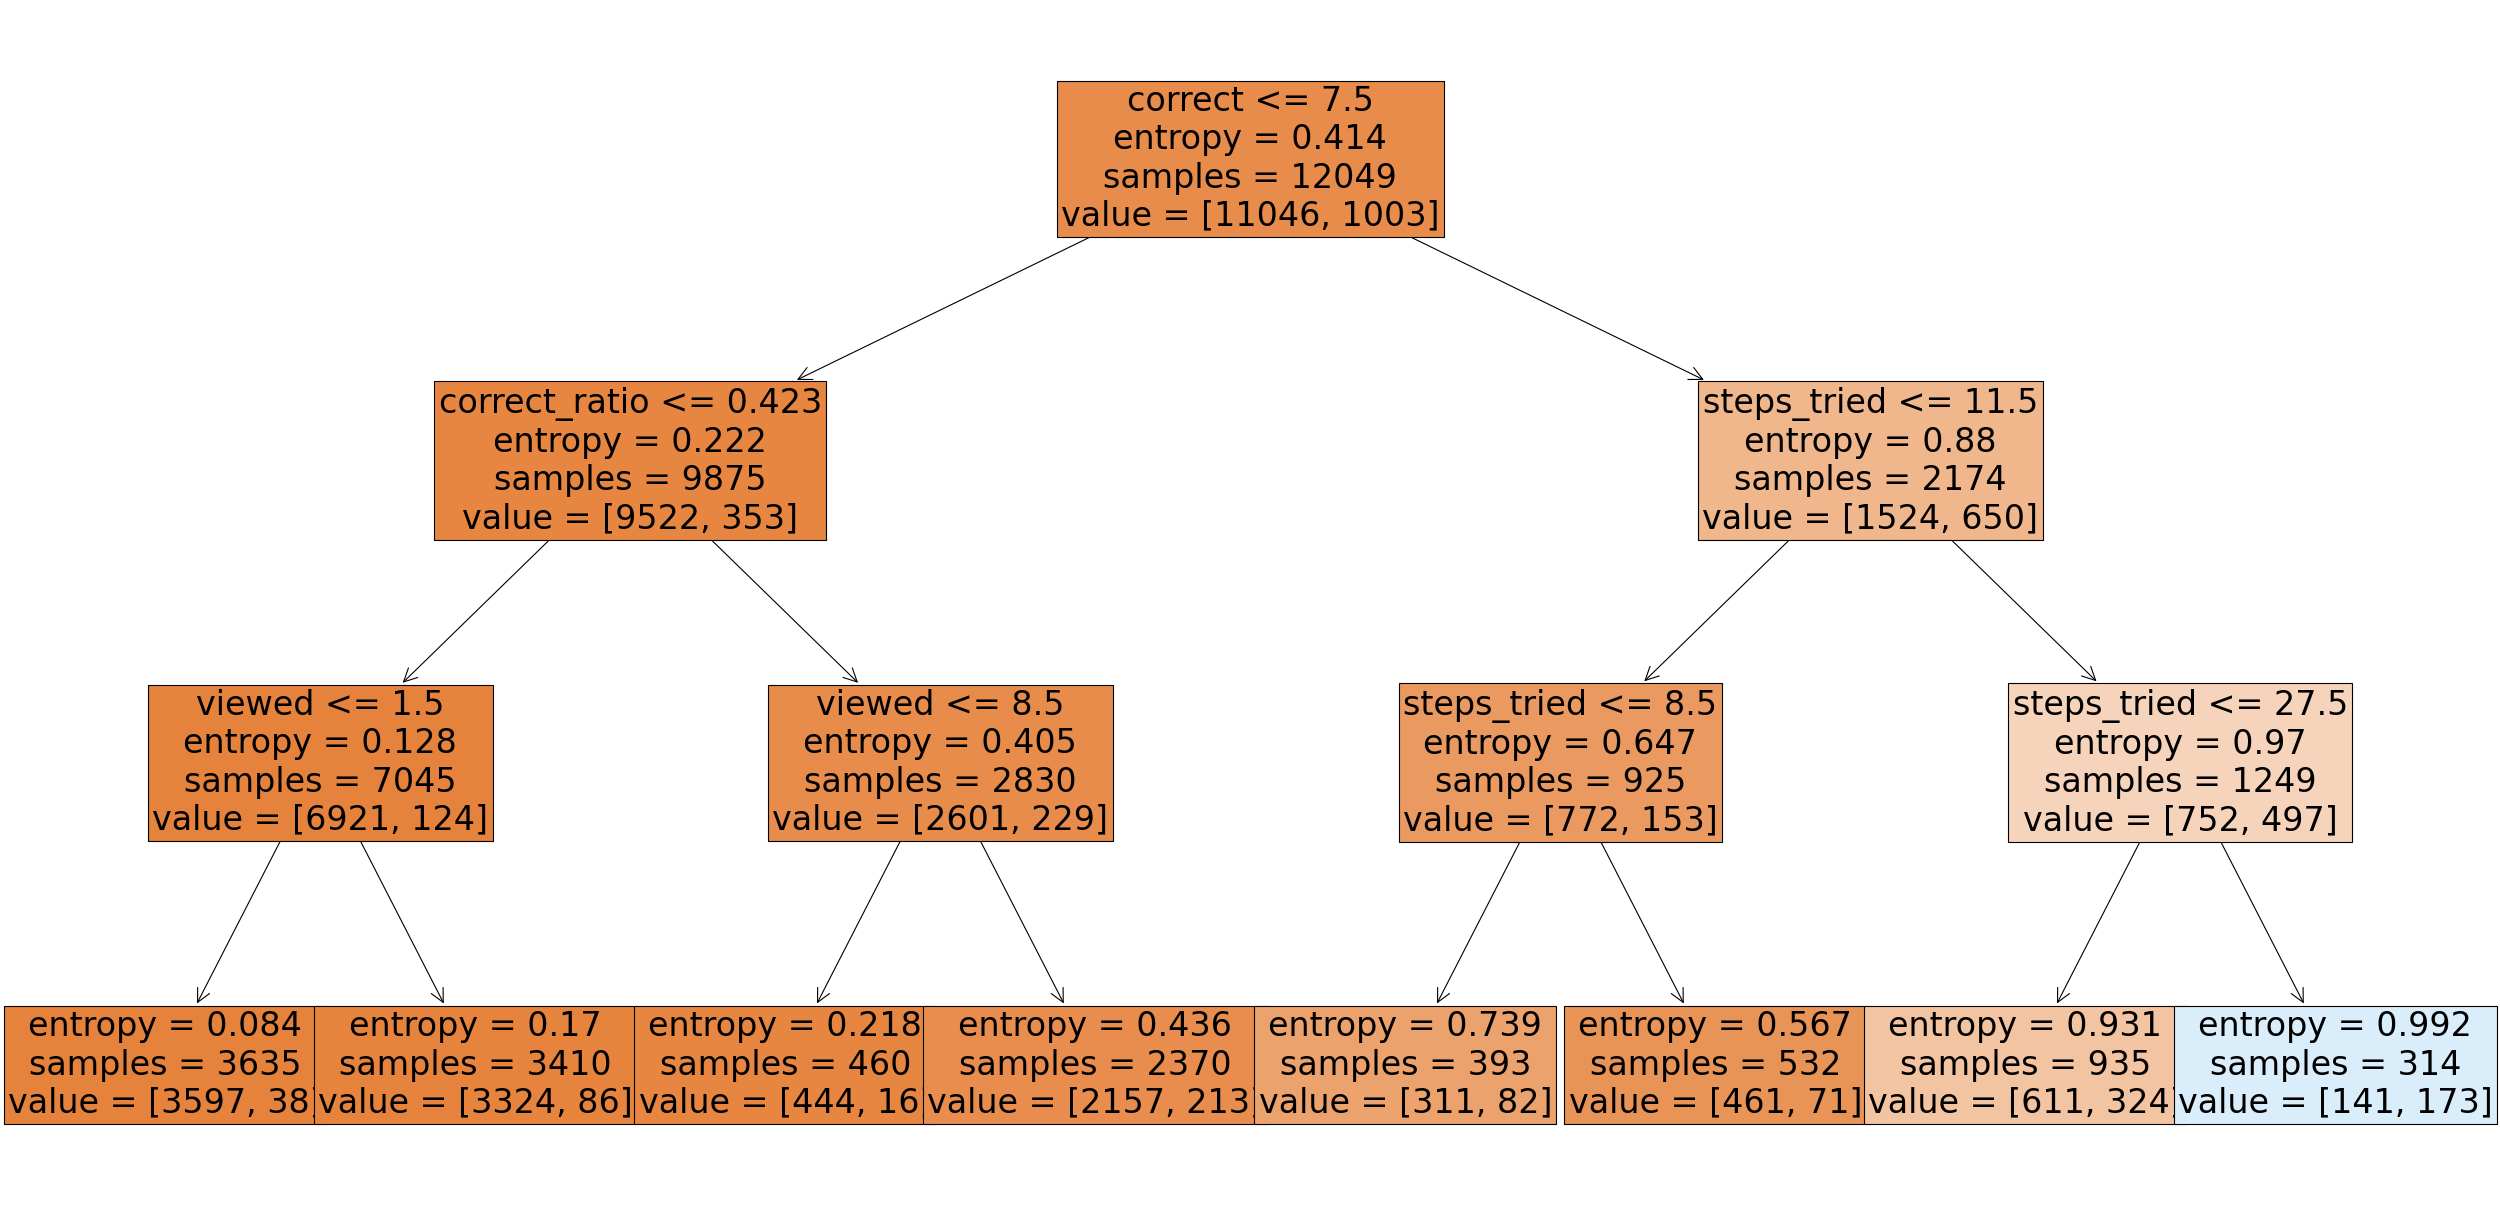

In [1114]:
plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clf, fontsize=30,filled=True,feature_names=list(X))

In [1115]:
clf.score(X_test, y_test)

TypeError: score() missing 2 required positional arguments: 'X' and 'y'